In [2]:
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from IPython.display import Image
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus


In [3]:
data = pd.read_csv('winequality.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
X = data.drop(columns='quality')
y = data['quality']

In [6]:
x_train,x_test, y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=355)

In [7]:
# Visualizing the tree without doing anything:

clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [8]:
feature_name = list(X.columns)
class_name = list(y_train.unique())
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [9]:
class_name

[7, 5, 3, 6, 4, 8]

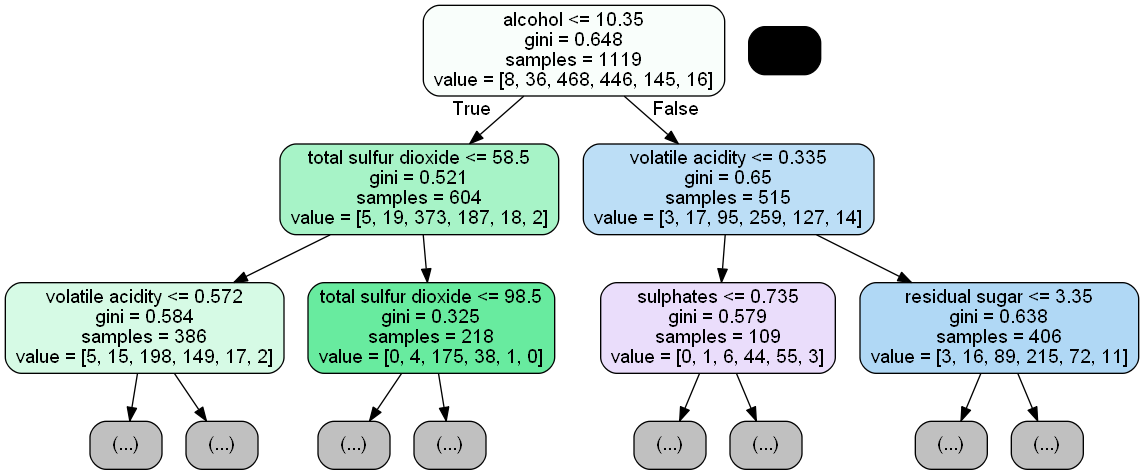

In [10]:
# Creating dot file to store the tree structure

dot_data = export_graphviz(clf,feature_names= feature_name, rounded=True, filled= True, max_depth=2)

# Draw Graph:
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('mytree.png')

Image(graph.create_png())

In [11]:
# Accuracy of the algorithm:
clf.score(x_test, y_test)

0.6166666666666667

In [12]:
py_pred = clf.predict(x_test)

In [18]:
# Tuning some of the Hyperparameters using gridsearchCV to find the best parameters:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2,320,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter': ['best', 'random']
}

In [19]:
grid_search = GridSearchCV(estimator=clf, param_grid=grid_param,cv=5, n_jobs=-1)


In [20]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 320),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [22]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 56, 'min_samples_leaf': 9, 'min_samples_split': 9, 'splitter': 'random'}


In [26]:
# Checking the Score:
grid_search.best_score_

0.6157351057014735

In [31]:
clf = DecisionTreeClassifier(criterion='gini', max_depth= 56, min_samples_leaf= 9,min_samples_split= 9,splitter= 'random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=56, min_samples_leaf=9, min_samples_split=9,
                       splitter='random')

In [32]:
clf.score(x_test,y_test)

0.5583333333333333

In [33]:
# Lets Visualize the tree:

feature_name = list(X.columns)
class_name = list(y_train.unique())


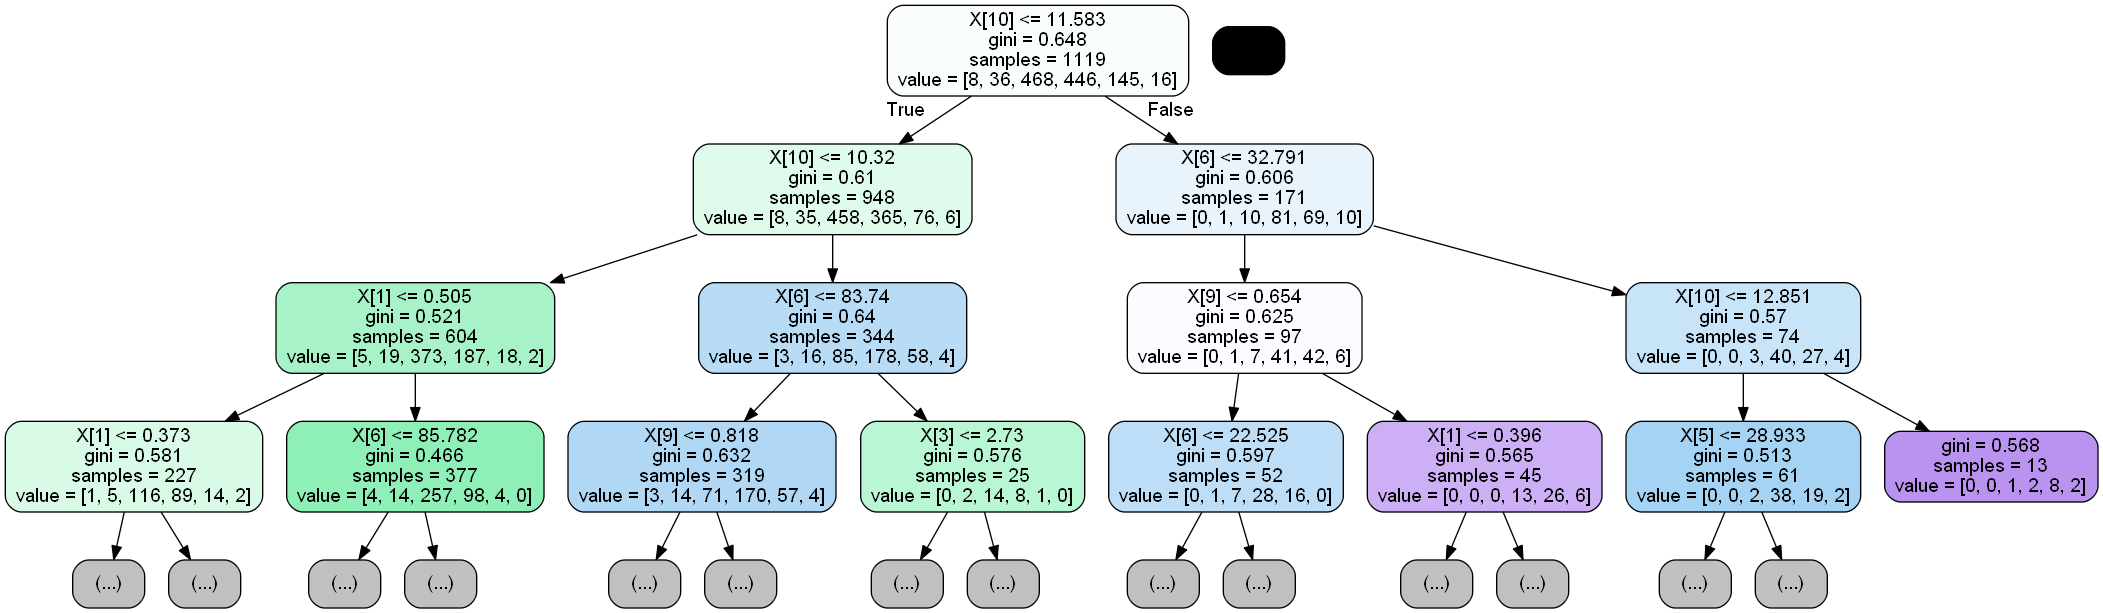

In [38]:
# Creating dot file to stire the tree structure:
dot_data = export_graphviz(clf,rounded = True, filled= True, max_depth=3)

# Lets draw the graph:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [43]:
# Saving the model in Pickle file:
import pickle

with open('modelForPrediction.sav', 'wb') as f:
    pickle.dump(clf,f)